 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

## Import libraries and dependencies

In [1]:
# Import the pandas,numpy,datetime and pathlib libraries
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

## Read CSVs as DataFrames
### Create a Path to the File Using Pathlib

In [2]:
# Use the Pathlib libary to set the path to the CSV
whale_returns = Path("Resources/whale_returns.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
whale_df = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Display a few rows from one DataFrame
whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


#### Clean whale_returns dataframe

In [3]:
# Count nulls for whale_returns
whale_df.isnull().mean() * 100


SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [4]:
# Drop null records for whale_returns
whale_df = whale_df.dropna().copy()


In [5]:
# Validate nulls have been dropped
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
# Preview whale_returns field using the head function.
whale_df.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

#### Read CSVs as DataFrames

In [7]:
# Use the Pathlib libary to set the path to the CSV

algo_returns = Path("Resources/algo_returns.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame

algo_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Display a few rows from one DataFrame
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


#### Clean algo_returns dataframe

In [8]:
# Count nulls for algo_returns
algo_df.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [9]:
# Drop null records for algo_returns
algo_df = algo_df.dropna().copy()

In [10]:
# Validate nulls have been dropped
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [11]:
# Preview algo_returns field using the head function.
algo_df.head(10)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
2014-06-12,-0.000028,-0.003841
2014-06-13,0.001917,-0.000814
2014-06-16,0.001084,0.001831
2014-06-17,0.000922,0.006870


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

#### Read CSVs as DataFrames

In [12]:
# Use the Pathlib libary to set the path to the CSV
sp_tsx_history = Path("Resources/sp_tsx_history.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
sp_df = pd.read_csv(sp_tsx_history, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Display a few rows from one DataFrame
sp_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [13]:
sp_df.columns

Index(['Close'], dtype='object')

#### Clean sp_tsx_history dataframe

In [14]:
# Check Data Types - Use the `dtypes` attribute to list the column data types
sp_df.dtypes

Close    object
dtype: object

In [15]:
# Count nulls for sp_tsx_history
sp_df.isnull().sum()

Close    0
dtype: int64

In [16]:
# Drop null records for sp_tsx_history
sp_df = sp_df.dropna().copy()

In [17]:
# Validate nulls have been dropped
sp_df.isnull().sum()

Close    0
dtype: int64

In [18]:
# Validate nulls have been dropped
sp_df.dropna(inplace=True)
sp_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [19]:
# Preview sp_tsx_history field using the head function.
sp_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [20]:
type(sp_df)

pandas.core.frame.DataFrame

In [21]:
sp_col = sp_df['Close']

In [22]:
type(sp_col)

pandas.core.series.Series

In [23]:
sp_col.head()

Date
2012-10-01    $12,370.19
2012-10-02    $12,391.23
2012-10-03    $12,359.47
2012-10-04    $12,447.68
2012-10-05    $12,418.99
Name: Close, dtype: object

In [24]:
# Clean sp_tsx_history price Series by replacing $
sp_df['Close'] = sp_df['Close'].str.replace("$", "")
sp_df['Close'] = sp_df['Close'].str.replace(",", "")
sp_df.head(10)

C:\Users\ashad\AppData\Local\Temp\ipykernel_15260\1071189764.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_df['Close'] = sp_df['Close'].str.replace("$", "")


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
2012-10-09,12273.57
2012-10-10,12212.42
2012-10-11,12233.95
2012-10-12,12202.04


In [25]:
# Fix Data Types
# Use the `as_type` function to convert object from `object` to `float`
sp_df = sp_df.astype("float")
sp_df.head(10)

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
2012-10-09,12273.57
2012-10-10,12212.42
2012-10-11,12233.95
2012-10-12,12202.04


In [26]:
# Rename Column name `Close` to 'daily returns'.

sp_df = sp_df.rename(columns={'Close': 'daily returns'})
sp_df.head()

,daily returns
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [27]:
# Calculate Daily Returns
sp_df = sp_df.pct_change()
sp_df.head()

,daily returns
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [28]:
# Rename Column name `Close` to 'daily returns'.

sp_df = sp_df.rename(columns={'daily returns': 'S&P TSX 60'})
sp_df.head()

,S&P TSX 60
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [29]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([whale_df, algo_df, sp_df], axis="columns", join="inner")
combined_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [30]:
# Drop NA
combined_df.dropna(inplace=True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [31]:
# Calculate daily returns of all portfolios
daily_returns_combined = combined_df
daily_returns_combined.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


<AxesSubplot:xlabel='Date'>

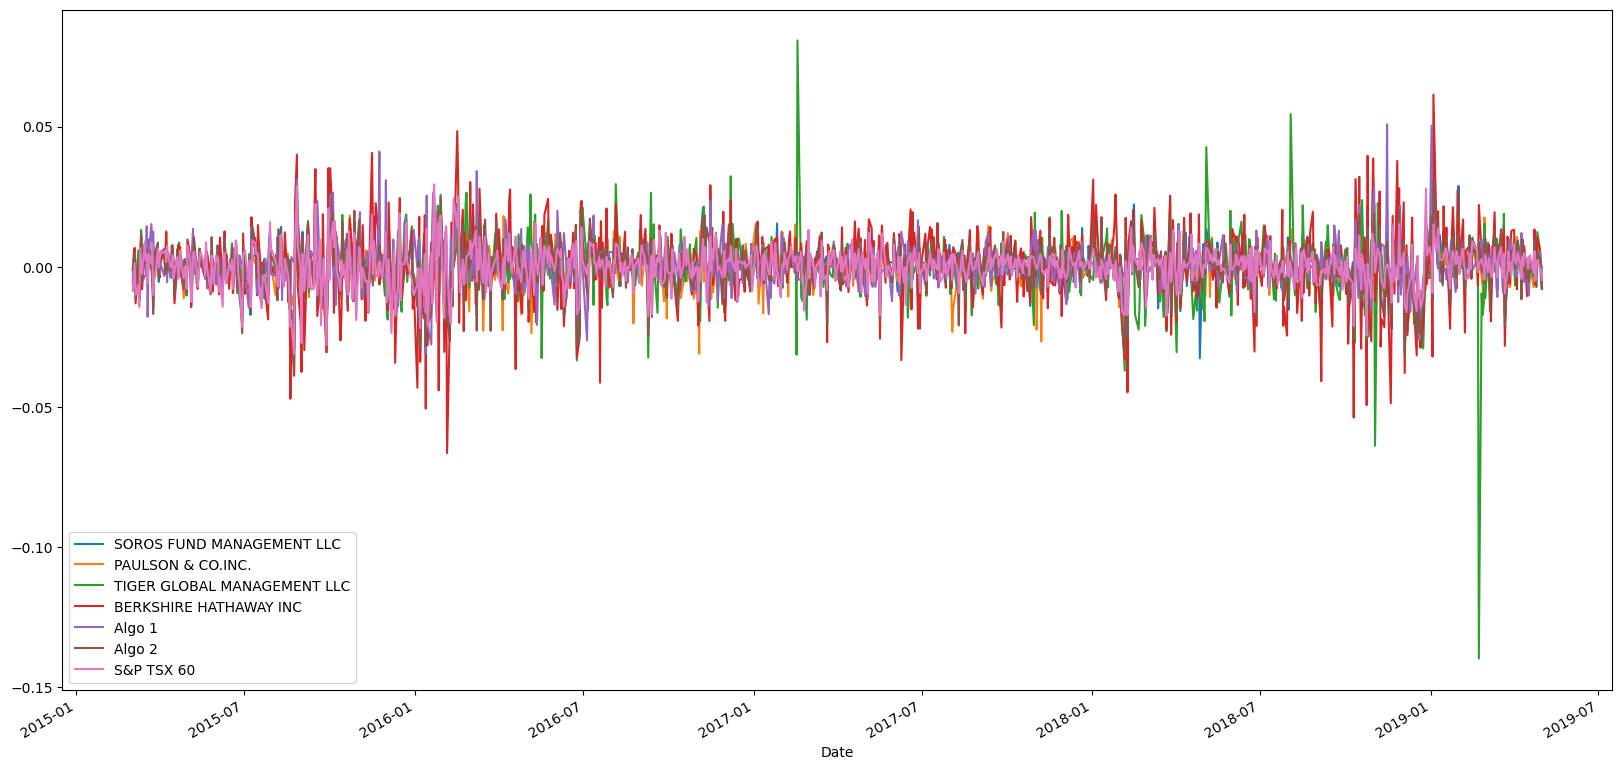

In [32]:
# Plot daily returns of all portfolios

daily_returns_combined.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

In [33]:
# Calculate cumulative returns of all portfolios
cumulative_returns_combined = (1 + daily_returns_combined).cumprod() - 1
cumulative_returns_combined.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.011872
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.010544
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.020411
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.026832


<AxesSubplot:xlabel='Date'>

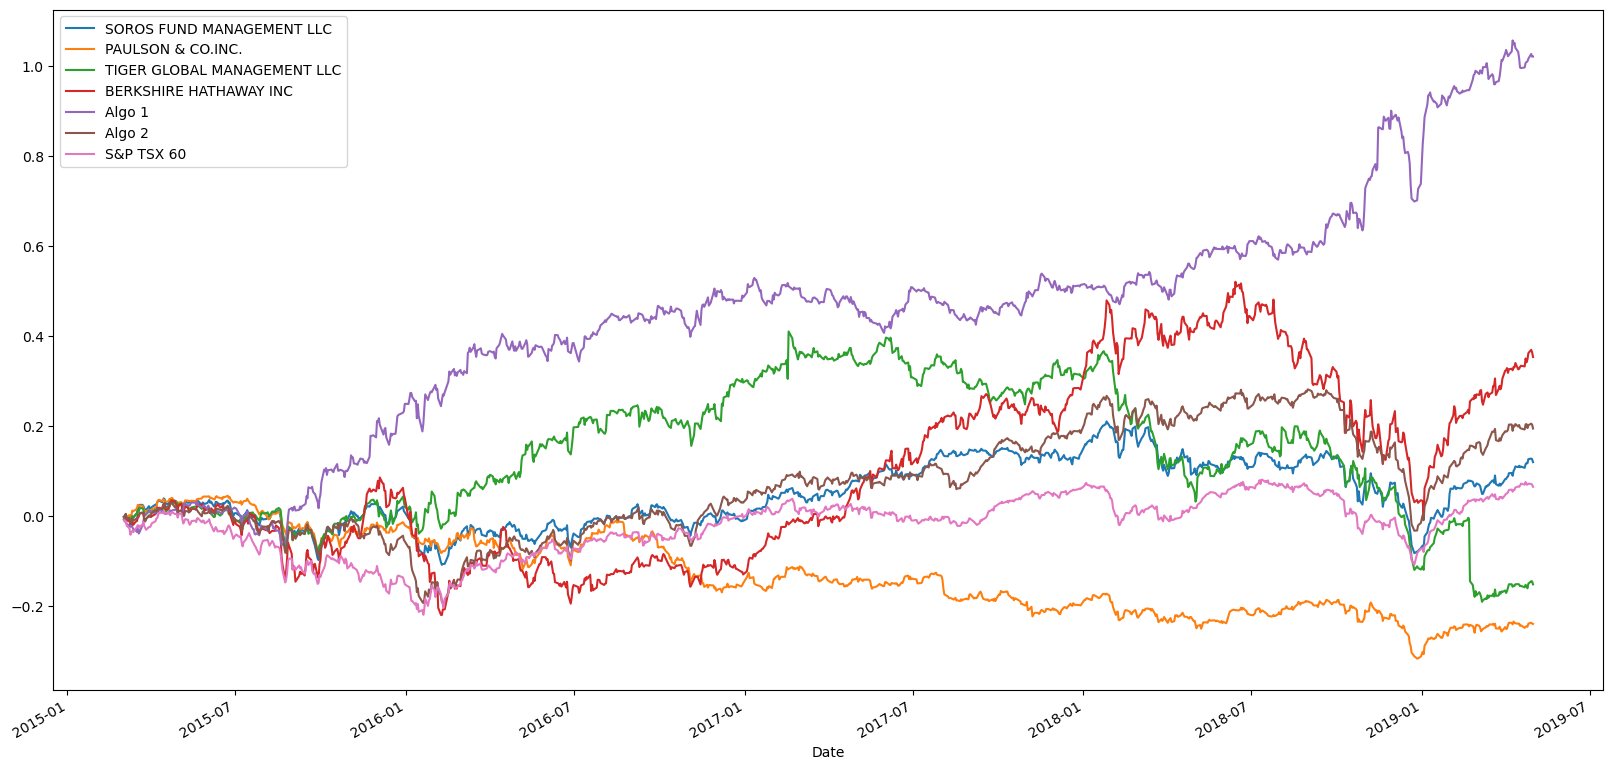

In [34]:
# Plot cumulative returns
cumulative_returns_combined.plot(figsize=(20,10))


#### Does any portfolio outperform the S&P TSX 60?
Plot displays that Algo 1 outprtformed the S&P TSX 60 followed by Berkshire Hathaway INC, Algo 2 and Soros Fund Management LLC.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio

<AxesSubplot:>

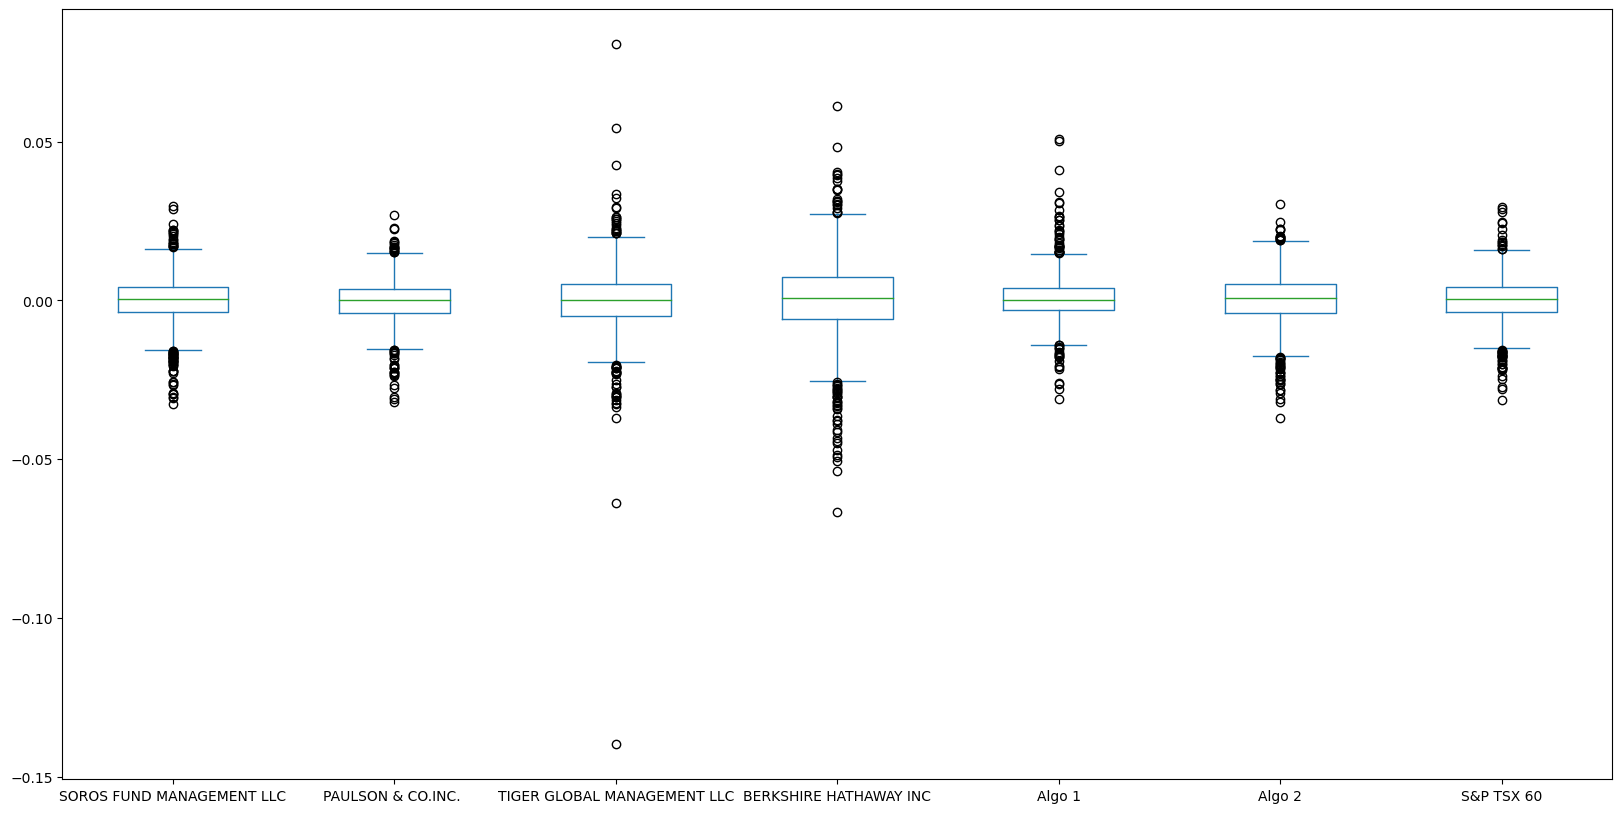

In [35]:
# Box plot to visually show risk
daily_returns_combined.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [36]:
# Calculate the daily standard deviations of all portfolios
daily_std_combined = daily_returns_combined.std()
daily_std_combined

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60                     0.007034
dtype: float64

In [37]:
# Sort standard deviation in ascending order
daily_std_combined = daily_std_combined.sort_values(ascending=False)
daily_std_combined.head(10)

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX 60                     0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [38]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_std_sp = sp_df.std()
daily_std_sp


S&P TSX 60    0.006637
dtype: float64

In [39]:
# Determine which portfolios are riskier than the S&P TSX 60
print(f"All the portfolios are riskier than the S&P TSX 60")

All the portfolios are riskier than the S&P TSX 60


### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_combined = daily_std_combined * np.sqrt(252)
annualized_std_combined.head(10)

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX 60                     0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [41]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
daily_returns_combined.rolling(window=21)

Rolling [window=21,center=False,axis=0,method=single]

<AxesSubplot:xlabel='Date'>

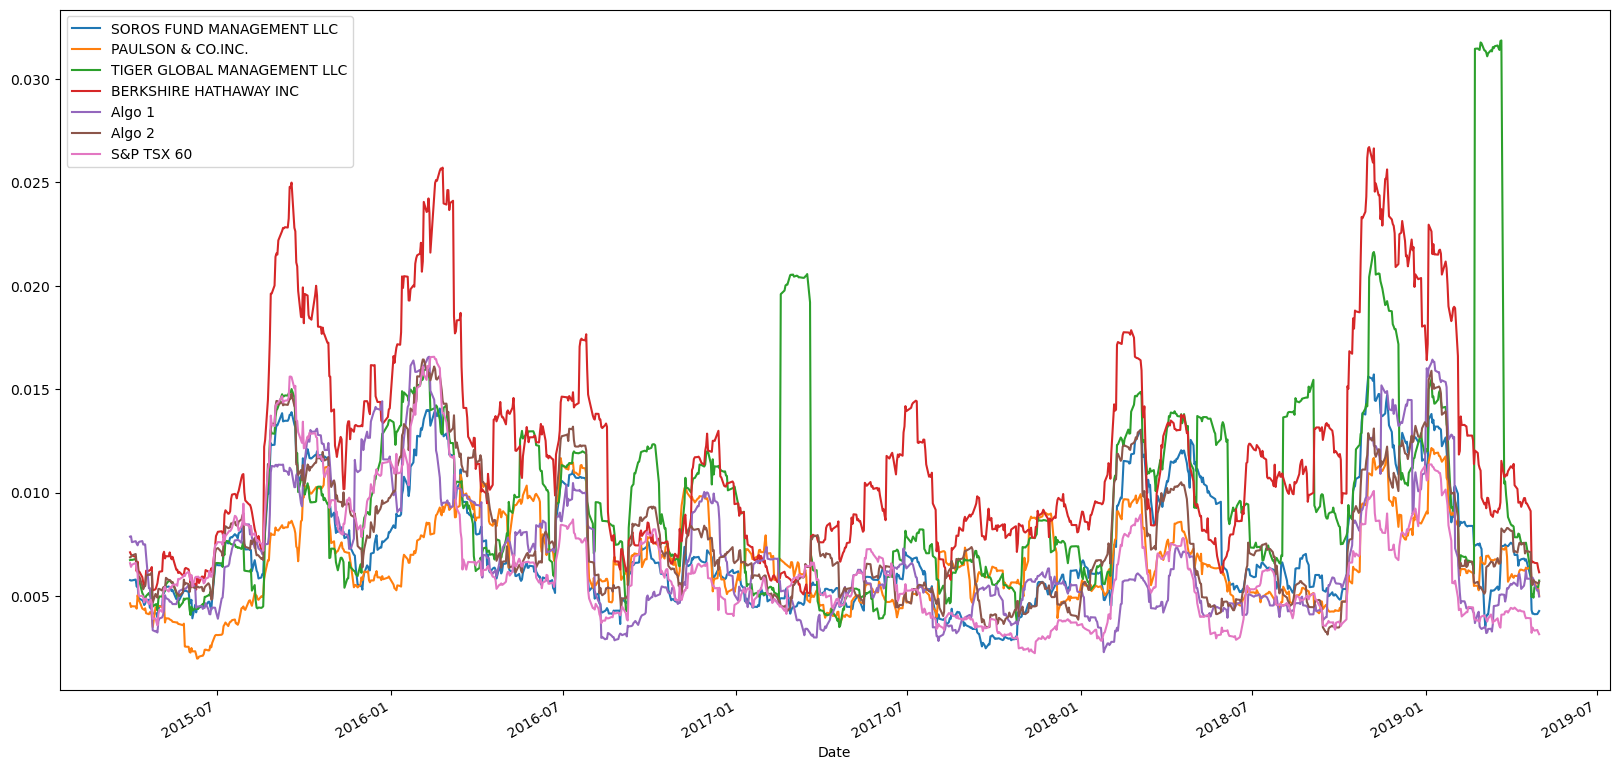

In [42]:
# Plot the rolling standard deviation
daily_returns_combined.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [43]:
# Calculate the correlation
correlation = combined_df.corr()
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

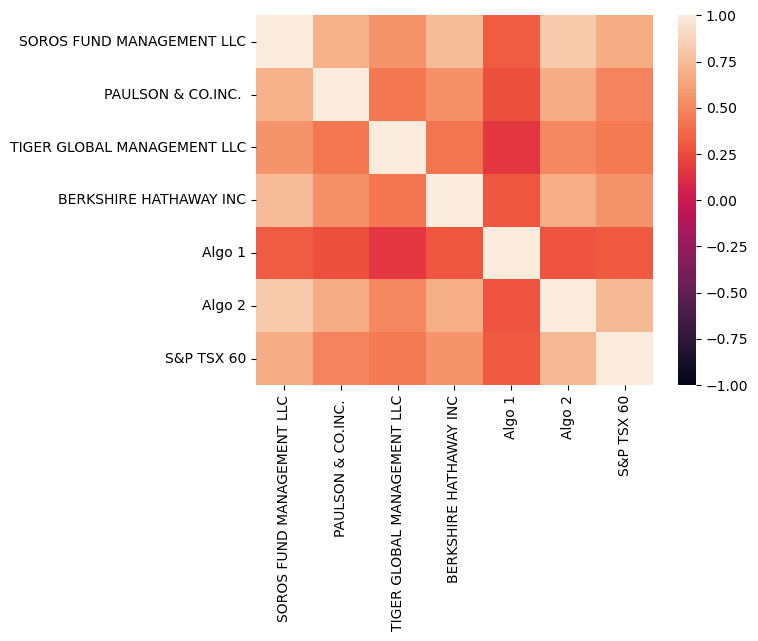

In [44]:
# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)


# Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

### Calculating 60 day rolling beta for Algo 1 and S&P TSX 60

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1 and S&P TSX 60'}, xlabel='Date'>

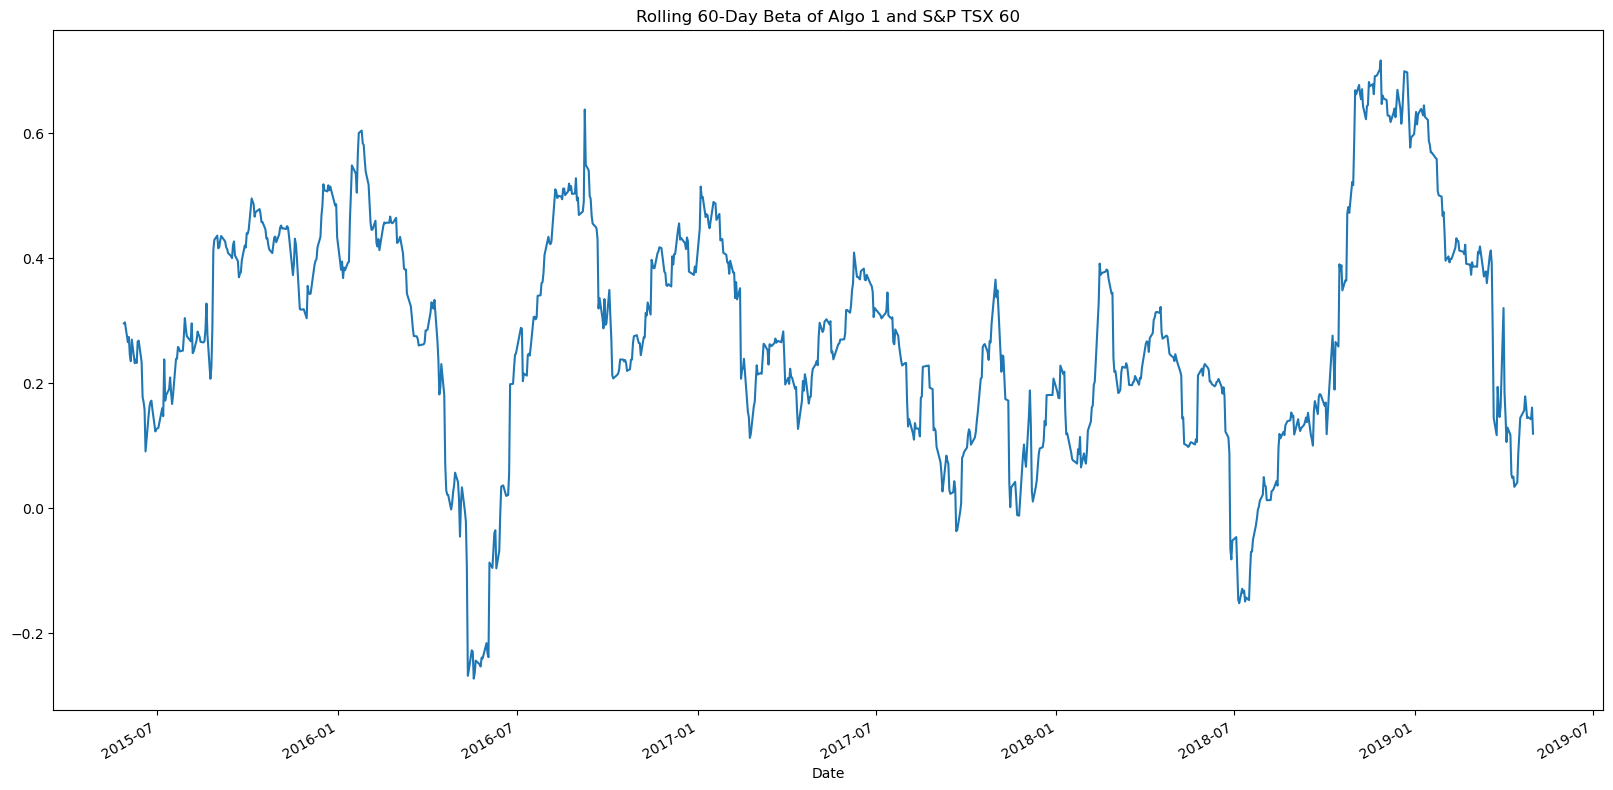

In [45]:
#Chosen poertfolio = Algo 1

## 11. Calculate 60-Day Rolling Covariance of Algo 1 vs. S&P 60 TSX and plot the data
rolling_covariance = daily_returns_combined['Algo 1'].rolling(window=60).cov(daily_returns_combined['S&P TSX 60'])

# Calculate variance of S&P TSX
rolling_variance = daily_returns_combined['S&P TSX 60'].rolling(window=60).var()

#Computing beta
rolling_beta = rolling_covariance / rolling_variance

#Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1 and S&P TSX 60')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [46]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Annualized Sharpe Ratios
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios = (daily_returns_combined.mean() * 252) / (daily_returns_combined.std() * np.sqrt(252))

# Display sharpe ratios
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

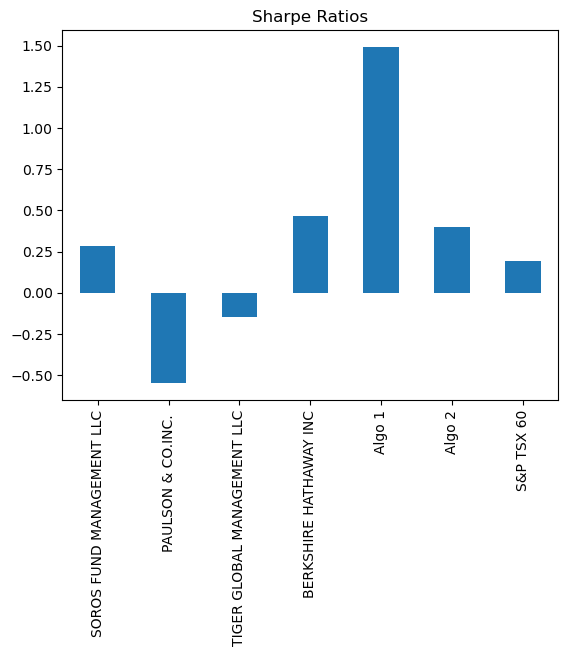

In [48]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

The image displays that the sharp ratio for Algo 1 is 1.491514 which is way higher than the S&P TSX 60 and the whales portfolios which are less than 1. However, Algo 2 (0.396817) did not performed well compared to these two portfolios. Therefore, Algo 1 outperformed both the market S&P TSX 60 and the whales portfolios.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [49]:
# Reading data from 1st stock = Apple Inc

# Use the Pathlib libary to set the path to the CSV
apple_returns = Path("Resources/apple_returns.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
apple_df = pd.read_csv(apple_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Display a few rows from one DataFrame
apple_df.head()


,APPL
Date,
2014-01-02,19.75
2014-01-03,19.32
2014-01-06,19.43
2014-01-07,19.29
2014-01-08,19.41


In [50]:
# Reading data from 2nd stock = Microsoft Corp

# Use the Pathlib libary to set the path to the CSV
msft_returns = Path("Resources/msft_returns.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
msft_df = pd.read_csv(msft_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Display a few rows from one DataFrame
msft_df.head()

,MSFT
Date,
2014-01-02,37.16
2014-01-03,36.91
2014-01-06,36.13
2014-01-07,36.41
2014-01-08,35.76


In [51]:
# Reading data from 3rd stock = IBM Common Stock

# Use the Pathlib libary to set the path to the CSV
ibm_returns = Path("Resources/ibm_returns.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
ibm_df = pd.read_csv(ibm_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Display a few rows from one DataFrame
ibm_df.head()

,IBM
Date,
2014-01-02,177.21
2014-01-03,178.27
2014-01-06,177.66
2014-01-07,181.20
2014-01-08,179.54


In [52]:
# Combine all stocks in a single DataFrame
custom_df = pd.concat([apple_df, msft_df, ibm_df], axis="columns", join="inner")
custom_df

,APPL,MSFT,IBM
Date,,,
2014-01-02,19.75,37.16,177.21
2014-01-03,19.32,36.91,178.27
2014-01-06,19.43,36.13,177.66
2014-01-07,19.29,36.41,181.20
2014-01-08,19.41,35.76,179.54
...,...,...,...
2022-12-05,146.63,250.20,147.41
2022-12-06,142.91,245.12,147.50
2022-12-07,140.94,244.37,147.27


In [53]:
# Calculate daily returns
custom_returns = custom_df.pct_change()
custom_returns.head()


,APPL,MSFT,IBM
Date,,,
2014-01-02,NaN,NaN,NaN
2014-01-03,-0.021772,-0.006728,0.005982
2014-01-06,0.005694,-0.021132,-0.003422
2014-01-07,-0.007205,0.007750,0.019926
2014-01-08,0.006221,-0.017852,-0.009161


In [54]:
# Drop NAs and Display sample data
custom_returns.dropna(inplace=True)
custom_returns.head()


,APPL,MSFT,IBM
Date,,,
2014-01-03,-0.021772,-0.006728,0.005982
2014-01-06,0.005694,-0.021132,-0.003422
2014-01-07,-0.007205,0.007750,0.019926
2014-01-08,0.006221,-0.017852,-0.009161
2014-01-09,-0.012880,-0.006432,-0.003119


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [55]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return and display sample data
weighted_returns = custom_returns.dot(weights)
weighted_returns.head()


Date
2014-01-03   -0.007506
2014-01-06   -0.006287
2014-01-07    0.006823
2014-01-08   -0.006931
2014-01-09   -0.007477
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [56]:
# Join your returns DataFrame to the original returns DataFrame
grand_return = pd.concat([daily_returns_combined, custom_returns], axis="columns", join="inner")
grand_return

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,APPL,MSFT,IBM
Date,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,0.002169,-0.013674,0.003458
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.006184,-0.005083,-0.010012
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.016801,0.001161,0.011033
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,0.001582,-0.017397,-0.016629
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,0.004423,0.011568,0.014334
...,...,...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,-0.009075,0.033117,-0.009500
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.004677,0.005730,0.005891
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.001370,-0.000924,-0.002778


In [57]:
print(grand_return)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496             

In [58]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
grand_return.dropna(inplace=True)
grand_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,APPL,MSFT,IBM
Date,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,0.002169,-0.013674,0.003458
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.006184,-0.005083,-0.010012
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.016801,0.001161,0.011033
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,0.001582,-0.017397,-0.016629
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,0.004423,0.011568,0.014334


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [59]:
# Calculate the daily `std`
daily_std_grand = grand_return.std()
daily_std_grand

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60                     0.007034
APPL                           0.015508
MSFT                           0.014801
IBM                            0.013112
dtype: float64

In [60]:
# Sort standard deviation in ascending order
daily_std_grand = daily_std_grand.sort_values(ascending=False)
daily_std_grand.head(10)

APPL                           0.015508
MSFT                           0.014801
IBM                            0.013112
BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX 60                     0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

In [61]:
# Calculate the annualized `std`
annualized_std_grand = daily_std_grand * np.sqrt(252)
annualized_std_grand.head(10)

APPL                           0.246181
MSFT                           0.234951
IBM                            0.208153
BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX 60                     0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [62]:
# Calculate rolling standard deviation
grand_return.rolling(window=21)


Rolling [window=21,center=False,axis=0,method=single]

<AxesSubplot:xlabel='Date'>

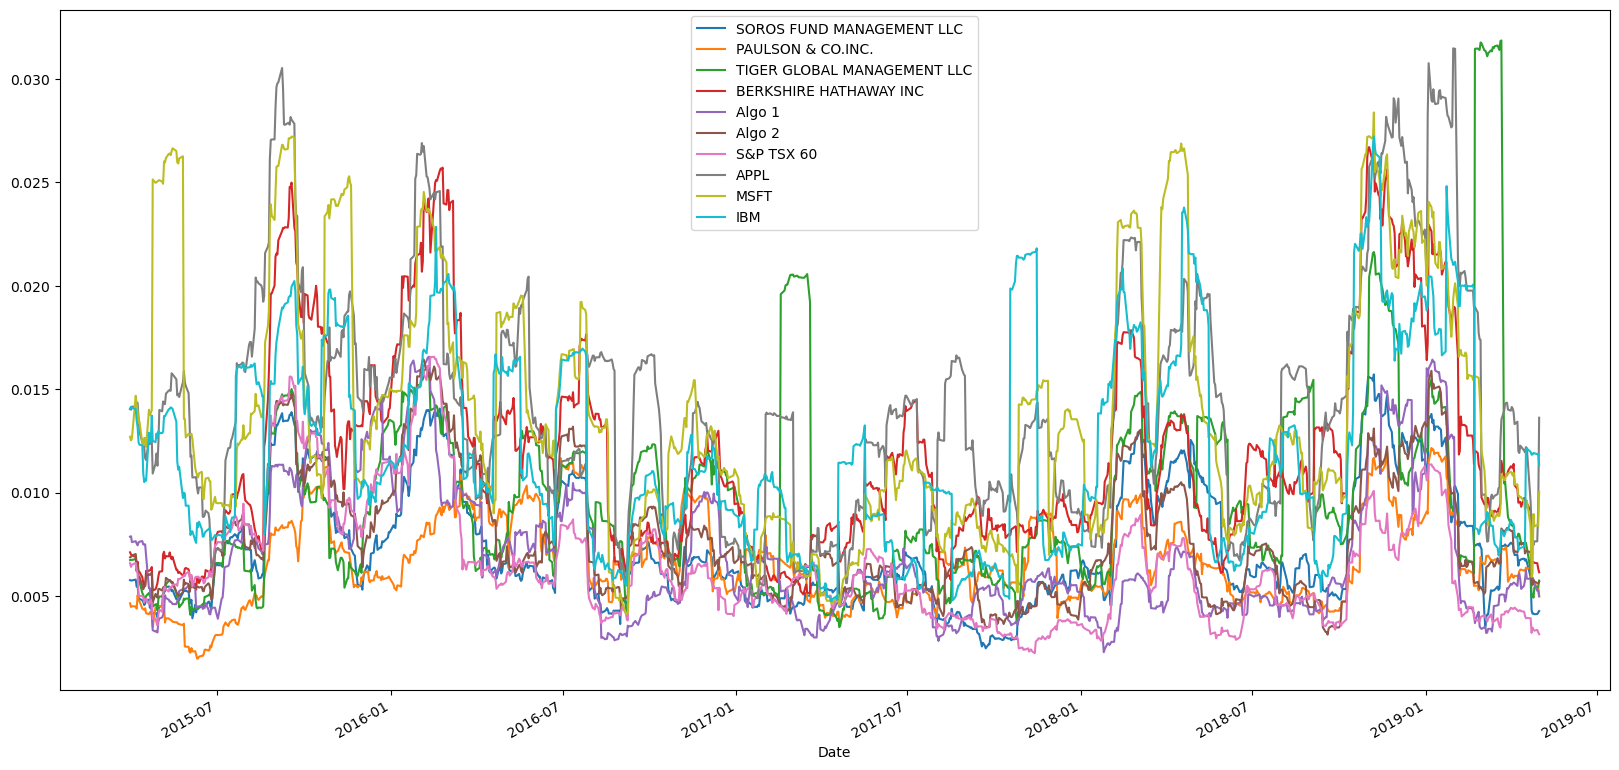

In [63]:
# Plot rolling standard deviation
grand_return.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [64]:
# Calculate and plot the correlation
correlation_grand = grand_return.corr()
correlation_grand

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,APPL,MSFT,IBM
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930,0.526925,0.595401,0.495462
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511,0.405264,0.447127,0.378305
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583,0.387181,0.435848,0.395723
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250,0.554899,0.635699,0.438696
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276,0.192327,0.178679,0.192877
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370,0.531273,0.583047,0.529208
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000,0.449683,0.497222,0.459059
APPL,0.526925,0.405264,0.387181,0.554899,0.192327,0.531273,0.449683,1.000000,0.571548,0.371921
MSFT,0.595401,0.447127,0.435848,0.635699,0.178679,0.583047,0.497222,0.571548,1.000000,0.465092
IBM,0.495462,0.378305,0.395723,0.438696,0.192877,0.529208,0.459059,0.371921,0.465092,1.000000


<AxesSubplot:>

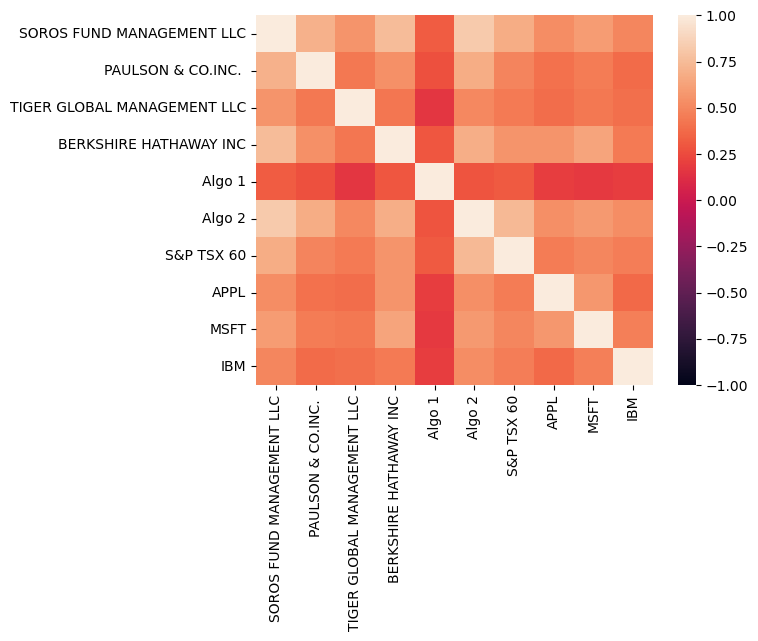

In [65]:
# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation_grand, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Apple and S&P TSX 60'}, xlabel='Date'>

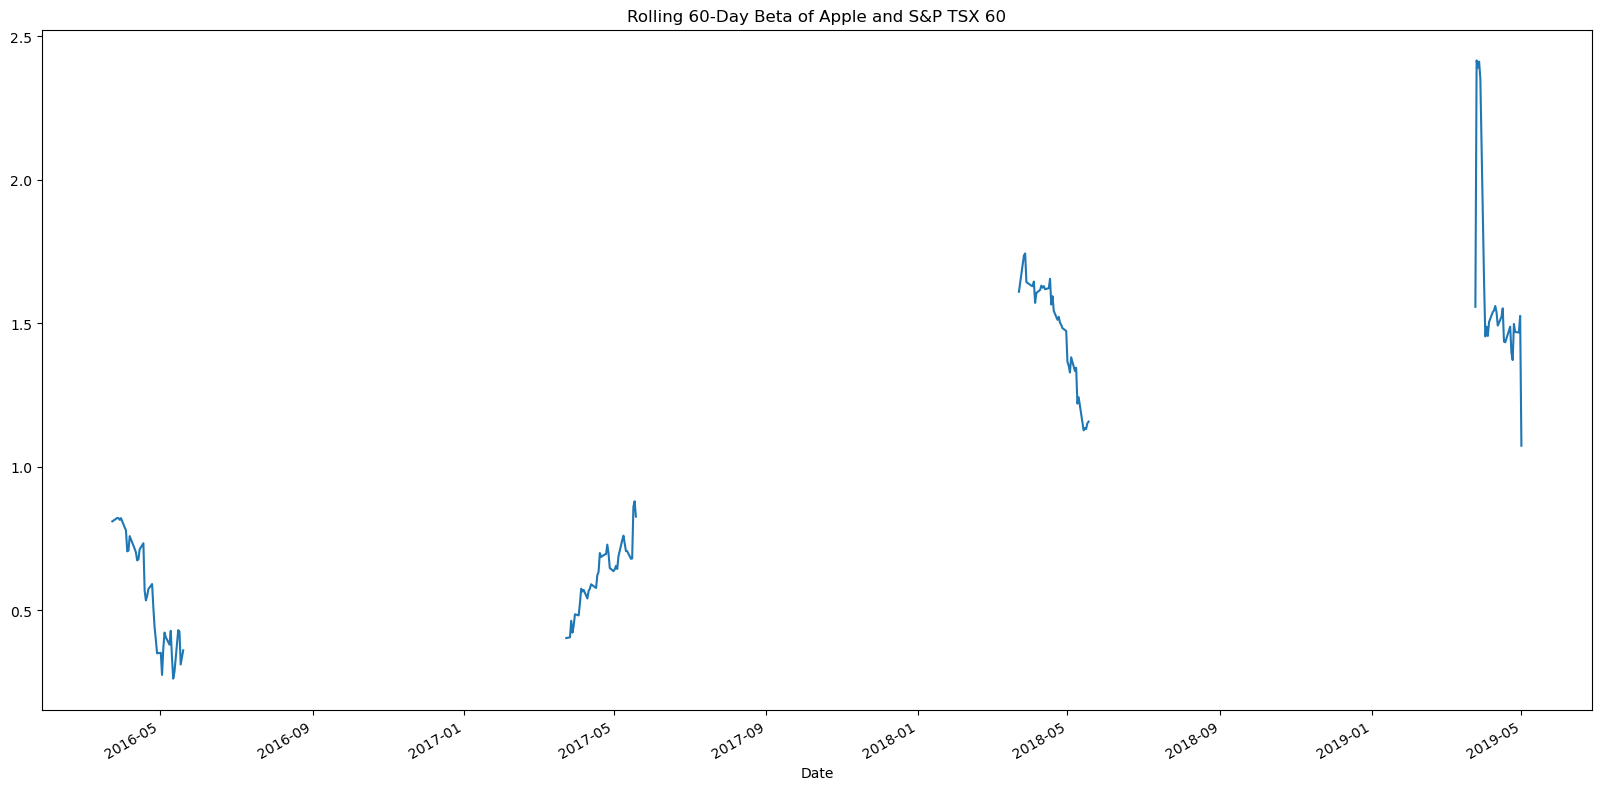

In [84]:
# Calculate and plot Beta

## 11. Calculate 60-Day Rolling Covariance of Apple vs. S&P 60 TSX and plot the data
rolling_covariance_grand = custom_returns['APPL'].rolling(window=60).cov(daily_returns_combined['S&P TSX 60'])

# Calculate variance of S&P TSX
rolling_variance_grand = daily_returns_combined['S&P TSX 60'].rolling(window=60).var()

#Computing beta
rolling_beta_grand = rolling_covariance_grand / rolling_variance_grand

#Plot beta trend
rolling_beta_grand.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Apple and S&P TSX 60')

<AxesSubplot:title={'center':'Rolling 60-Day Beta of APPL and S&P TSX 60'}, xlabel='Date'>

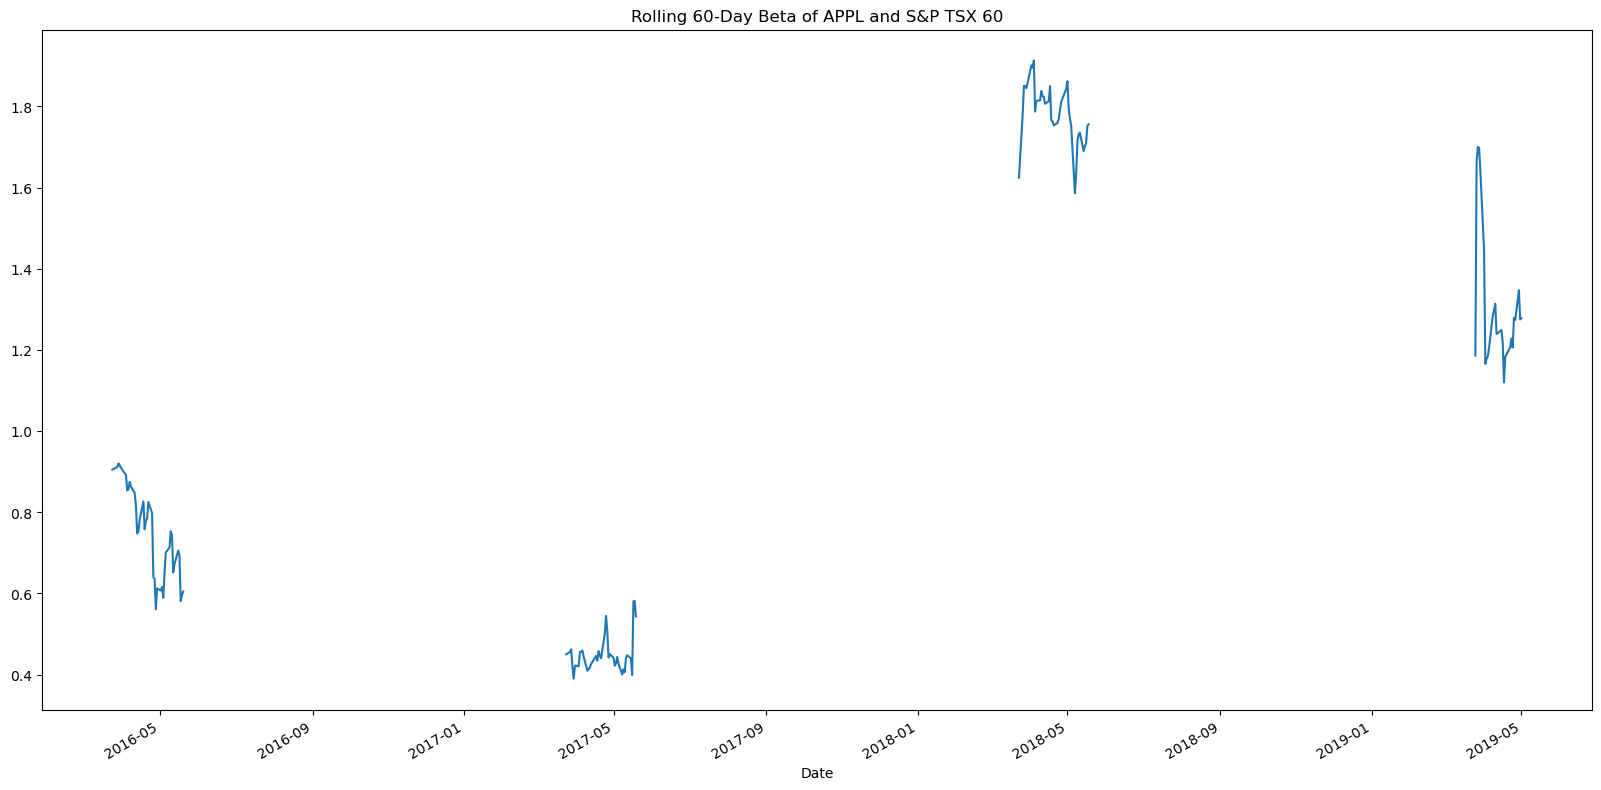

In [81]:
# Calculate and plot Beta

## 11. Calculate 60-Day Rolling Covariance of Microsoft vs. S&P 60 TSX and plot the data
rolling_covariance_grand = custom_returns['MSFT'].rolling(window=60).cov(daily_returns_combined['S&P TSX 60'])

# Calculate variance of S&P TSX
rolling_variance_grand = daily_returns_combined['S&P TSX 60'].rolling(window=60).var()

#Computing beta
rolling_beta_grand = rolling_covariance_grand / rolling_variance_grand

#Plot beta trend
rolling_beta_grand.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Microsoft and S&P TSX 60')

<AxesSubplot:title={'center':'Rolling 60-Day Beta of IBM and S&P TSX 60'}, xlabel='Date'>

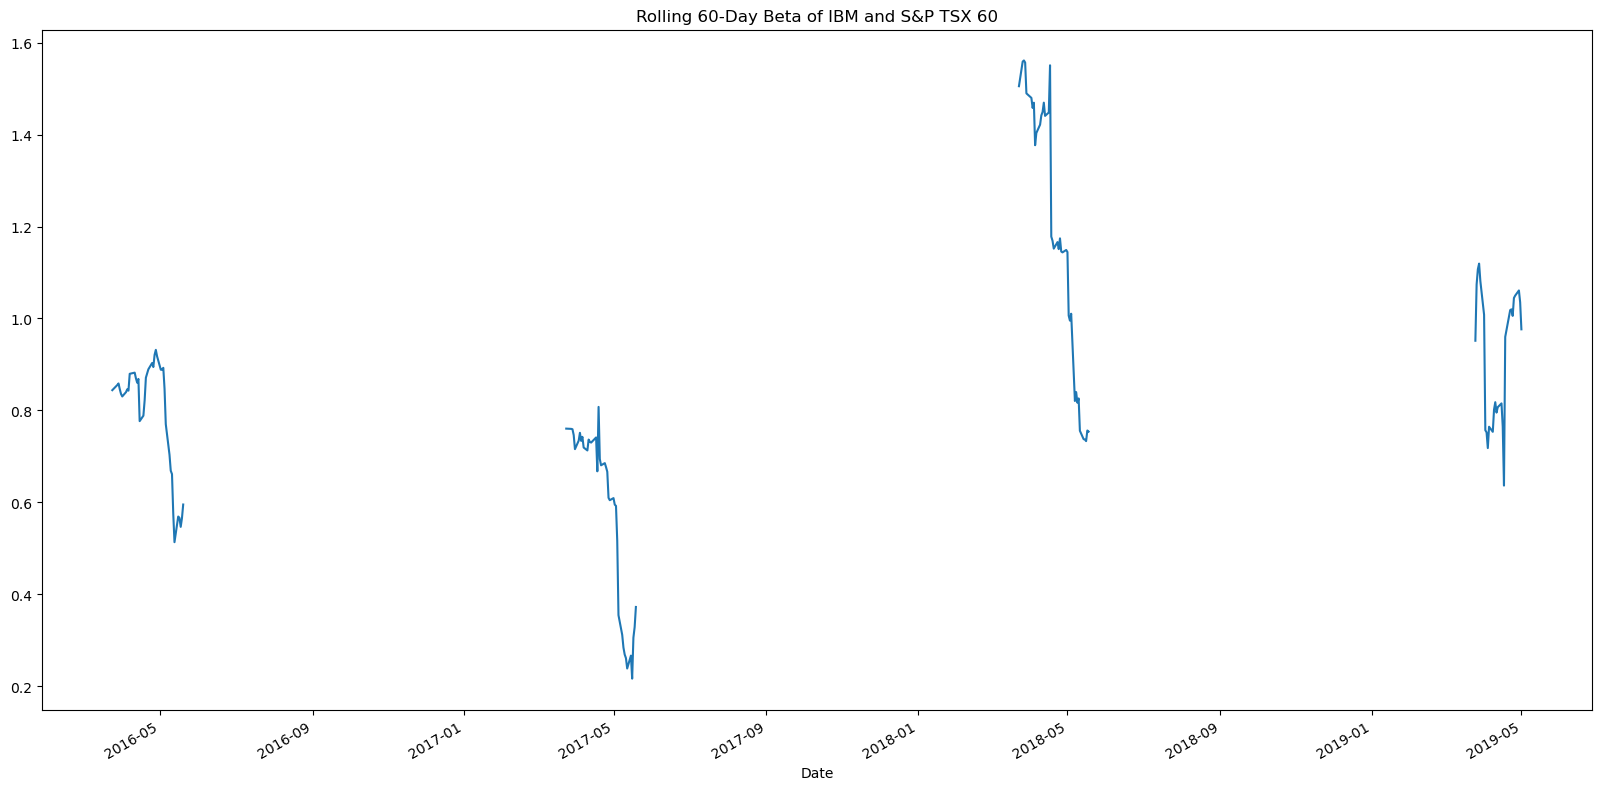

In [82]:
# Calculate and plot Beta

## 11. Calculate 60-Day Rolling Covariance of IBM vs. S&P 60 TSX and plot the data
rolling_covariance_grand = custom_returns['IBM'].rolling(window=60).cov(daily_returns_combined['S&P TSX 60'])

# Calculate variance of S&P TSX
rolling_variance_grand = daily_returns_combined['S&P TSX 60'].rolling(window=60).var()

#Computing beta
rolling_beta_grand = rolling_covariance_grand / rolling_variance_grand

#Plot beta trend
rolling_beta_grand.plot(figsize=(20, 10), title='Rolling 60-Day Beta of IBM and S&P TSX 60')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [88]:
# Calculate Annualized Sharpe Ratios
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios_grand = (grand_return.mean() * 252) / (grand_return.std() * np.sqrt(252))

# Display sharpe ratios
sharpe_ratios_grand


SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
APPL                           0.489420
MSFT                           1.150894
IBM                           -0.090322
dtype: float64

In [90]:
# Sort sharpe ratios in ascending order
sharpe_ratios_grand = sharpe_ratios_grand.sort_values(ascending=False)
sharpe_ratios_grand.head(10)

Algo 1                         1.491514
MSFT                           1.150894
APPL                           0.489420
BERKSHIRE HATHAWAY INC         0.467045
Algo 2                         0.396817
SOROS FUND MANAGEMENT LLC      0.286709
S&P TSX 60                     0.195550
IBM                           -0.090322
TIGER GLOBAL MANAGEMENT LLC   -0.144455
PAULSON & CO.INC.             -0.547594
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

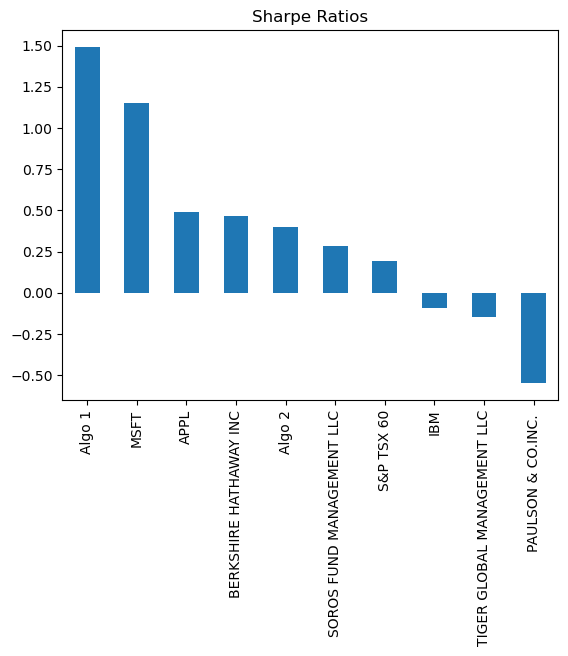

In [91]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_grand.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Still the Algo 1 is leading the charts followedd by my custom portfolios Microsoft and Apple.